In [1]:
%matplotlib inline

In [2]:
from galsize_models.models.load_baseline_catalogs import load_umachine_mock
mock = load_umachine_mock()


Total runtime = 33.26 seconds
['obs_sfr', 'icl', 'upid', 'mpeak', 'sfr', 'halo_id', 'mvir', 'rvir', 'vmax_at_mpeak', 'vx', 'a_first_infall', 'sm', 'vy', 'y', 'x', 'vz', 'z', 'dvmax_zscore', 'obs_sm', 'halo_hostid', 'host_halo_rvir', 'host_halo_mvir', 'ssfr', 'is_main_sequence', 'is_green_valley', 'is_quenched', 'logsm', 'rvir_halo_kpc', 'rvir_halo_kpc_present_day', 'spin_at_infall', 'bt_meert15_random']


In [3]:
from galsize_models.models.bulge_disk_double_power_law import galaxy_size_vs_rhalo

norm_bulge = 0.002
bulge_to_disk_size_ratio = 1/7.
alpha_bulge = 1.25
alpha_disk = 1
scatter = 0.2

norm_disk = norm_bulge/bulge_to_disk_size_ratio

rvir_halo_kpc = mock['rvir_halo_kpc']
bt = mock['bt_meert15_random']

size_seed=14041

mock['r50_magr_kpc_meert15'] = galaxy_size_vs_rhalo(rvir_halo_kpc, bt, 
                    norm_bulge, norm_disk, 
                     alpha_bulge, alpha_disk, scatter=scatter, seed=size_seed)


bulge_dominated_mask_mock = mock['bt_meert15_random'] > 0.75
disk_dominated_mask_mock = mock['bt_meert15_random'] < 0.25
mixed_morphology_mask_mock = ~disk_dominated_mask_mock & ~bulge_dominated_mask_mock


In [4]:
print(mock.keys())

['obs_sfr', 'icl', 'upid', 'mpeak', 'sfr', 'halo_id', 'mvir', 'rvir', 'vmax_at_mpeak', 'vx', 'a_first_infall', 'sm', 'vy', 'y', 'x', 'vz', 'z', 'dvmax_zscore', 'obs_sm', 'halo_hostid', 'host_halo_rvir', 'host_halo_mvir', 'ssfr', 'is_main_sequence', 'is_green_valley', 'is_quenched', 'logsm', 'rvir_halo_kpc', 'rvir_halo_kpc_present_day', 'spin_at_infall', 'bt_meert15_random', 'r50_magr_kpc_meert15']


In [7]:
mpeak_mask = (mock['mpeak'] > 1e12) & (mock['mpeak'] < 2e12)
mpeak_sample = mock[mpeak_mask]

cenmask = sample['upid'] == -1
cens = sample[cenmask]
sats = sample[~cenmask]

In [8]:
np.median(cens['r50_magr_kpc_meert15']), np.median(sats['r50_magr_kpc_meert15'])

(3.4251843638852852, 2.3850696803107589)

In [10]:
np.median(cens['bt_meert15_random']), np.median(sats['bt_meert15_random'])

(0.33642220419102375, 0.48295337028970392)

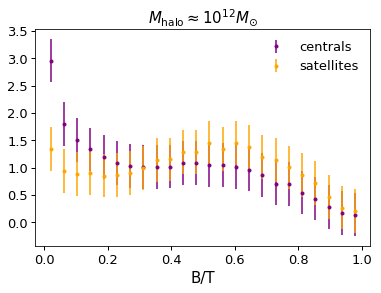

In [28]:
fig, ax = plt.subplots(1, 1)

bt_bin_edges = np.linspace(0, 1, 25)
bt_bin_mids = 0.5*(bt_bin_edges[:-1] + bt_bin_edges[1:])
cens_bt_pdf, __ = np.histogram(cens['bt_meert15_random'], bins=bt_bin_edges, density=True)
sats_bt_pdf, __ = np.histogram(sats['bt_meert15_random'], bins=bt_bin_edges, density=True)

__=ax.errorbar(bt_bin_mids, cens_bt_pdf, 0.4, fmt='.', color='purple', label='centrals')
__=ax.errorbar(bt_bin_mids, sats_bt_pdf, 0.4, fmt='.', color='orange', label='satellites')


title = ax.set_title(r'$M_{\rm halo} \approx 10^{12}M_{\odot}$')
legend = ax.legend()
xlabel = ax.set_xlabel(r'B/T')
ylabel = ax.set_ylabel(r'PDF')
figname = 'random_bt_centrals_vs_satellites.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel], bbox_inches='tight')
